# Section 1: the Python you will need for this course

## Numerical processing

----
TBD: Discussion of the need for numerical processing

1. NumPy - foundational arrays and data structures
2. SciPy - numerical processing and algorithms
3. Pandas - data frames, columnar access, queries, time series data access
4. Matplotlib - visualization of data / results
5. Theano - arrays and fft library
6. Keras - a Neural Net library built on top of Theano
7. Pattern - a Natural Language processing library. Obsolete now, but great for learning


In [1]:
from IPython.display import display

----

### NumPy - foundational arrays and data structures

The NumPy `array` will be used to store all the data we're going to be working with (sometimes behind other libraries like Pandas).

It provides simple and efficient vector operations (eg, `arr * 3`), aggregations (eg, `arr.sum()`), and the supporting libraries implement a variety of mathmatical, statistical, and scientific operations.

In [2]:
import numpy as np

In [3]:
print "Vector operations:"
a = np.array([1, 2, 3])
b = np.array([10, 20, 30])
print "a:", a
print "b:", b
print "a * 3:", a * 3
print "a + b:", a + b

Vector operations:
a: [1 2 3]
b: [10 20 30]
a * 3: [3 6 9]
a + b: [11 22 33]


In [4]:
print "Multidimentional arrays:"

a = np.array([
    [1, 10],
    [2, 20],
    [3, 30],
])
print "a:\n", a
print "a.shape:", a.shape
print

print "a[:, 0]:", a[:, 0]
print "a[:, 1]:", a[:, 1]
print "a[0, :]:", a[0, :]
print "a[0]:   ", a[0]
print

print "a.mean():", a.mean()
print "a.mean(axis=0):", a.mean(axis=0)
print "a.mean(axis=1):", a.mean(axis=1)

Multidimentional arrays:
a:
[[ 1 10]
 [ 2 20]
 [ 3 30]]
a.shape: (3, 2)

a[:, 0]: [1 2 3]
a[:, 1]: [10 20 30]
a[0, :]: [ 1 10]
a[0]:    [ 1 10]

a.mean(): 11.0
a.mean(axis=0): [  2.  20.]
a.mean(axis=1): [  5.5  11.   16.5]


----
SciPy - numerical processing and algorithms

In [5]:
# TODO: fill this out once we know which parts of scipy we'll be using

----
### Pandas - data frames, columnar access, queries, time series data access

Pandas provides DataFrames, collections of data akin to database tables, which can be easily queried and composed. It also has first-class support for timeseries data.

In [6]:
import pandas as pd

df = pd.DataFrame({
    "handle": ["vladnikiporov", "wolever", "grahamtoppin"],
    "tweets": [28, 42328, 174],
    "following": [34, 647, 86],
})

df

,following,handle,tweets
0,34,vladnikiporov,28
1,647,wolever,42328
2,86,grahamtoppin,174


In [7]:
df.sort('tweets')

,following,handle,tweets
0,34,vladnikiporov,28
2,86,grahamtoppin,174
1,647,wolever,42328


In [8]:
# Indexing into a DataFrame returns the individual Series:
df['handle']

0    vladnikiporov
1          wolever
2     grahamtoppin
Name: handle, dtype: object

In [9]:
# DataFrames and Series can be treated (mostly) like a NumPy array
df["tweets"] / df["following"]

0     0.823529
1    65.421947
2     2.023256
dtype: float64

In [10]:
df["tweets_to_following"] = df["tweets"] / df["following"]
df

,following,handle,tweets,tweets_to_following
0,34,vladnikiporov,28,0.823529
1,647,wolever,42328,65.421947
2,86,grahamtoppin,174,2.023256


In [11]:
# The most powerful aspect of Pandas is the fact that data is _indexed_
tdf = df.set_index("handle")
tdf

,following,tweets,tweets_to_following
handle,,,
vladnikiporov,34,28,0.823529
wolever,647,42328,65.421947
grahamtoppin,86,174,2.023256


In [12]:
# Notice that the tweet counts are now associated with the user's handle
tdf["tweets"]

handle
vladnikiporov       28
wolever          42328
grahamtoppin       174
Name: tweets, dtype: int64

In [13]:
print "Notice that the two indexes are identical:"
print "tdf.index:          ", tdf.index
print "tdf['tweets'].index:", tdf["tweets"].index

Notice that the two indexes are identical:
tdf.index:           Index([u'vladnikiporov', u'wolever', u'grahamtoppin'], dtype='object', name=u'handle')
tdf['tweets'].index: Index([u'vladnikiporov', u'wolever', u'grahamtoppin'], dtype='object', name=u'handle')


In [14]:
# DataFrames and series are automatically joined on their indexes
followers = pd.Series([1891, 8, 70], index=["wolever", "vladnikiporov", "grahamtoppin"], name="followers")
print "Notice that the ratios are correct even though the indecies are in a different order:"
followers / tdf["following"]

Notice that the ratios are correct even though the indecies are in a different order:


grahamtoppin     0.813953
vladnikiporov    0.235294
wolever          2.922720
dtype: float64

In [15]:
# And we can join the followers to the rest of the twitter handles
tdf.join(followers)

,following,tweets,tweets_to_following,followers
handle,,,,
vladnikiporov,34,28,0.823529,8
wolever,647,42328,65.421947,1891
grahamtoppin,86,174,2.023256,70


In [16]:
# DataFrames can be queried in two ways: slicing with a mask, and the `.query` method.

# To query by slicing with a mask, a boolean mask is created:
print "The boolean mask:"
display(tdf["tweets"] < 1000)
print
print

print "Rows with fewer than 1,000 tweets:"
# And the DF is sliced with it:
tdf[tdf["tweets"] < 1000]

The boolean mask:


handle
vladnikiporov     True
wolever          False
grahamtoppin      True
Name: tweets, dtype: bool



Rows with fewer than 1,000 tweets:


,following,tweets,tweets_to_following
handle,,,
vladnikiporov,34,28,0.823529
grahamtoppin,86,174,2.023256


In [17]:
# The `query` method accepts a Python expression and returns the matching rows:
tdf.query("tweets < 1000")

,following,tweets,tweets_to_following
handle,,,
vladnikiporov,34,28,0.823529
grahamtoppin,86,174,2.023256


TODO: I could write about Pandas for days, so I'm going to stop here… but possibly it's worth including timeseries? Idk, we'll see what we end up using... http://pandas.pydata.org/pandas-docs/stable/timeseries.html

----

### Matplotlib - visualization of data / results

Matplotlib is an incredibly flexible plotting library. See the gallery for a more complete list of examples: http://matplotlib.org/gallery.html

In [18]:
# This IPython magic imports matplotlib as plt and configures it to render images in the Notebook
# It's also worth experimenting with `%matplotlib notebook` to get a more interactive plot,
# but as of this writing there are still some drawbacks (which you'll notice when you use it).
%matplotlib inline
import matplotlib.pyplot as plt

# Set the default figure to be a bit wider
plt.rcParams['figure.figsize'] = (15, 5)


from ml4p.entropy import Entropy
e1 = Entropy(seed=1)
e2 = Entropy(seed=2)

/Users/wolever/code/ml-for-python-programmers/.env/ml4p/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


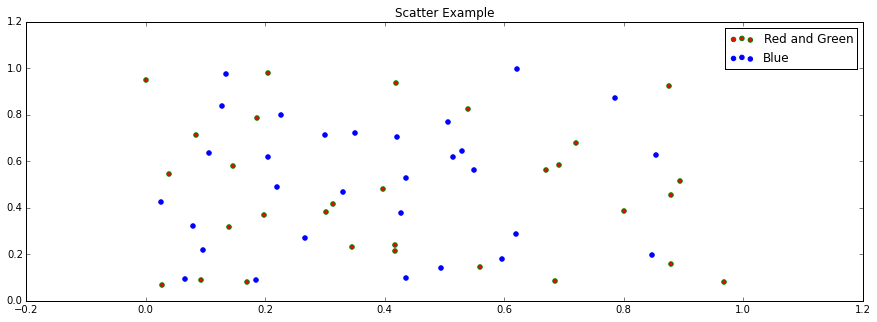

In [19]:
plt.title("Scatter Example")
plt.scatter(e1.random(30), e1.reseed().random(30), color="red", edgecolor="green", label="Red and Green")
plt.scatter(e2.random(30), e2.reseed().random(30), color="blue", label="Blue")
plt.legend()

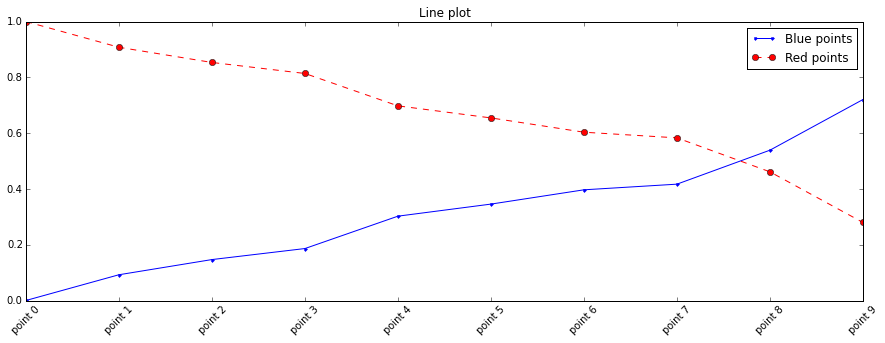

In [20]:
points = e1.random(10)
points.sort()
xaxis = np.arange(len(points))
plt.title("Line plot")
plt.plot(xaxis, points, ".-", label="Blue points")
plt.plot(xaxis, 1 - points, "o--", color="red", label="Red points")
plt.xticks(xaxis, [ "point %s" %(x, ) for x in xaxis], rotation=45)
plt.legend()

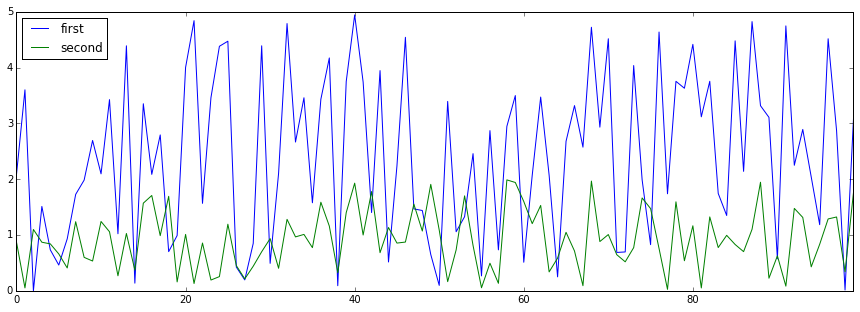

In [25]:
# Often we'll use matplotlib through Panda's convinience functions

df = pd.DataFrame({
    "first": e1.random(100) * 5,
    "second": e2.random(100) * 2,
})
df.plot()

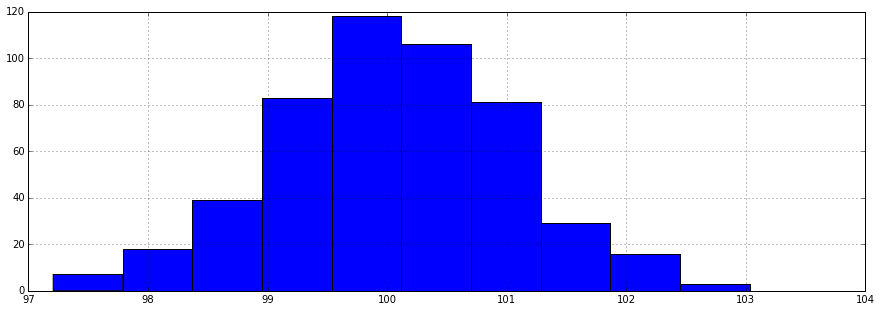

In [27]:
# Pandas makes it especially easy to create histograms
s = pd.Series(e1.normal(100, size=500))
s.hist()

----
Theano - arrays and fft library

----
Keras - a Neural Net library built on top of Theano

----
Pattern - a Natural Language processing library. Obsolete now, but great for learning

----
Gensim - extracting topics

----
NLTK / Pattern - detecting simple sentiment

----
NLTK / Pattern - Showing the structure of a sentence